### COVID-19 
### UPDATE by DAY in the countries: CHINA, GERMANY, ITALY, KOREA, JAPAN

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.start import *
from Starts.startml import *
from Starts.startvis import *  
%matplotlib inline
rcParams['figure.figsize'] = 20, 6

C:\Users\Duc-LongPhan\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


Start importing folder
['.gitignore', '01-22-2020.csv', '01-23-2020.csv', '01-24-2020.csv', '01-25-2020.csv', '01-26-2020.csv', '01-27-2020.csv', '01-28-2020.csv', '01-29-2020.csv', '01-30-2020.csv', '01-31-2020.csv', '02-01-2020.csv', '02-02-2020.csv', '02-03-2020.csv', '02-04-2020.csv', '02-05-2020.csv', '02-06-2020.csv', '02-07-2020.csv', '02-08-2020.csv', '02-09-2020.csv', '02-10-2020.csv', '02-11-2020.csv', '02-12-2020.csv', '02-13-2020.csv', '02-14-2020.csv', '02-15-2020.csv', '02-16-2020.csv', '02-17-2020.csv', '02-18-2020.csv', '02-19-2020.csv', '02-20-2020.csv', '02-21-2020.csv', '02-22-2020.csv', '02-23-2020.csv', '02-24-2020.csv', '02-25-2020.csv', '02-26-2020.csv', '02-27-2020.csv', '02-28-2020.csv', '02-29-2020.csv', 'README.md']
None
None


In [2]:
from covid import *
print("Number of outbreak days: ", len(data))

Number of outbreak days:  39


In [3]:
# data[0] is the first outbreak day and number of countries
data[0]['Country/Region'].unique(), len(data[0]['Country/Region'].unique())

(array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
        'Thailand', 'South Korea'], dtype=object), 8)

In [4]:
# data[-1] is the latest outbreak day and number of countries
data[-1]['Country/Region'].unique(), len(data[-1]['Country/Region'].unique())

(array(['Mainland China', 'South Korea', 'Italy', 'Others', 'Iran',
        'Japan', 'Singapore', 'France', 'Hong Kong', 'Germany', 'Kuwait',
        'Spain', 'US', 'Thailand', 'Bahrain', 'Taiwan', 'Malaysia', 'UK',
        'United Arab Emirates', 'Switzerland', 'Vietnam', 'Norway', 'Iraq',
        'Sweden', 'Canada', 'Macau', 'Australia', 'Austria', 'Israel',
        'Croatia', 'Netherlands', 'Oman', 'Greece', 'Lebanon', 'Mexico',
        'Pakistan', 'Denmark', 'Finland', 'India', 'Philippines',
        'Romania', 'Brazil', 'Russia', 'Afghanistan', 'Algeria', 'Belarus',
        'Belgium', 'Cambodia', 'Egypt', 'Estonia', 'Georgia', 'Iceland',
        'Ireland', 'Lithuania', 'Luxembourg', 'Monaco', 'Nepal',
        'New Zealand', 'Nigeria', 'North Macedonia', 'Qatar', 'San Marino',
        'Sri Lanka'], dtype=object), 63)

In [5]:
# the first day in China
StartML.searchByValue(data[0], column='Country/Region', value='Mainland China')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN
5,Guangdong,Mainland China,1/22/2020 17:00,26.0,NaN,NaN
6,Guangxi,Mainland China,1/22/2020 17:00,2.0,NaN,NaN
7,Guizhou,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
8,Hainan,Mainland China,1/22/2020 17:00,4.0,NaN,NaN
9,Hebei,Mainland China,1/22/2020 17:00,1.0,NaN,NaN


In [6]:
# the first day in Germany
StartML.searchByValue(data[0], column='Country/Region', value='Germany')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered


In [7]:
# the first day in Italy
StartML.searchByValue(data[0], column='Country/Region', value='Italy')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered


In [8]:
# the first day in Korea
StartML.searchByValue(data[0], column='Country/Region', value='Korea')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered


In [9]:
# the first day in Japan
StartML.searchByValue(data[0], column='Country/Region', value='Japan')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
35,NaN,Japan,1/22/2020 17:00,2.0,NaN,NaN


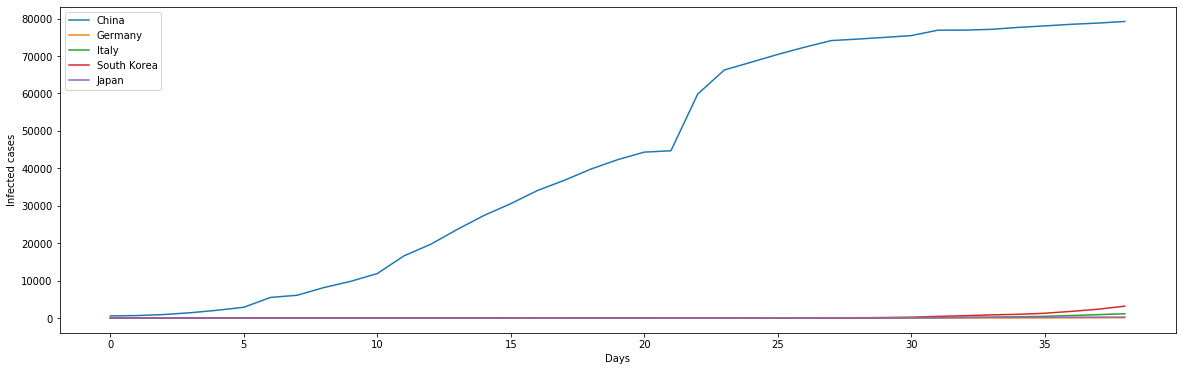

In [10]:
y_dat = [y_dat_cn, y_dat_de, y_dat_it, y_dat_kn, y_dat_jap]
x_dat = np.arange(len(data))

for y in y_dat:
    plt.plot(x_dat, y)
    
plt.xlabel('Days')
plt.ylabel('Infected cases')
plt.legend(["China", "Germany", "Italy", "South Korea", "Japan"])


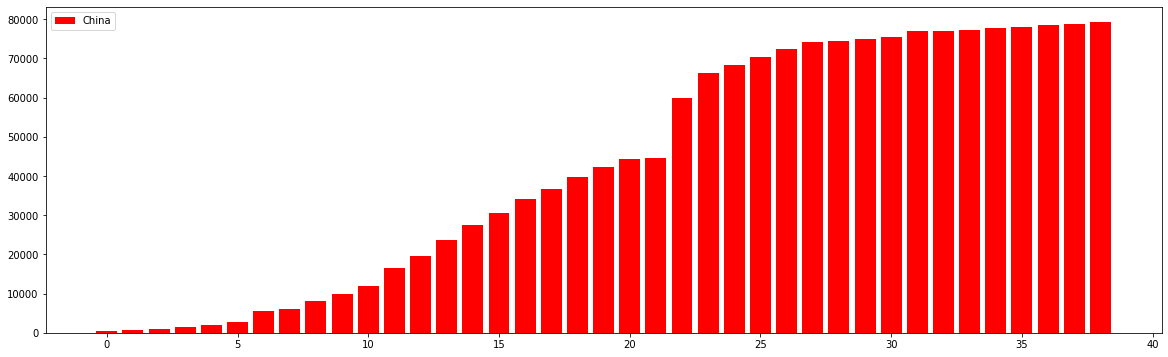

In [11]:
plt.bar(x_dat, y_dat_cn, color='red')
plt.legend(["China"])

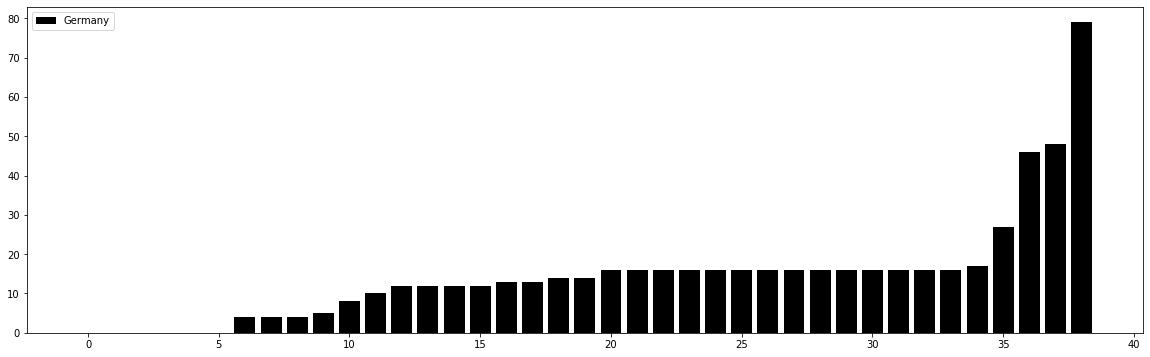

In [12]:
plt.bar(x_dat, y_dat_de, color='black')
plt.legend(["Germany"])

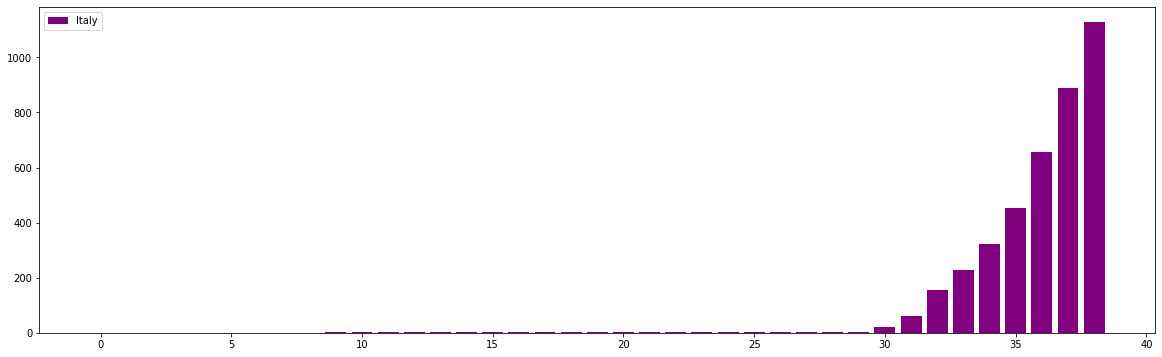

In [13]:
plt.bar(x_dat, y_dat_it, color='Purple')
plt.legend(["Italy"])

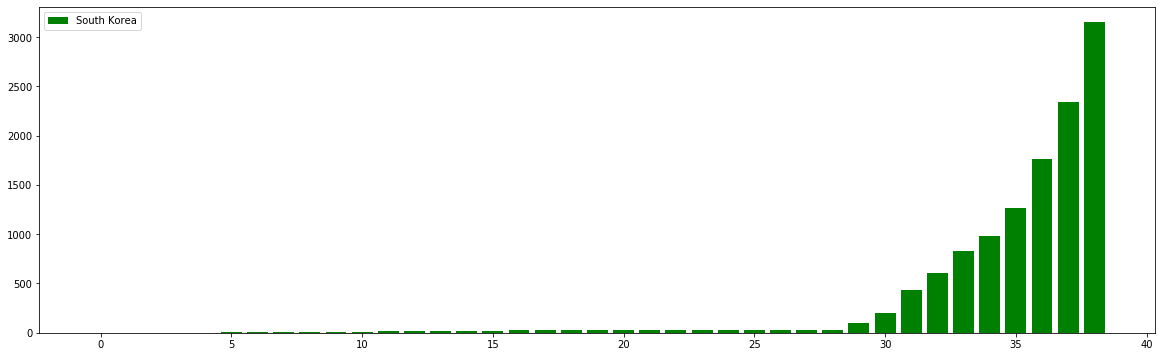

In [14]:
plt.bar(x_dat, y_dat_kn, color='green')
plt.legend(["South Korea"])

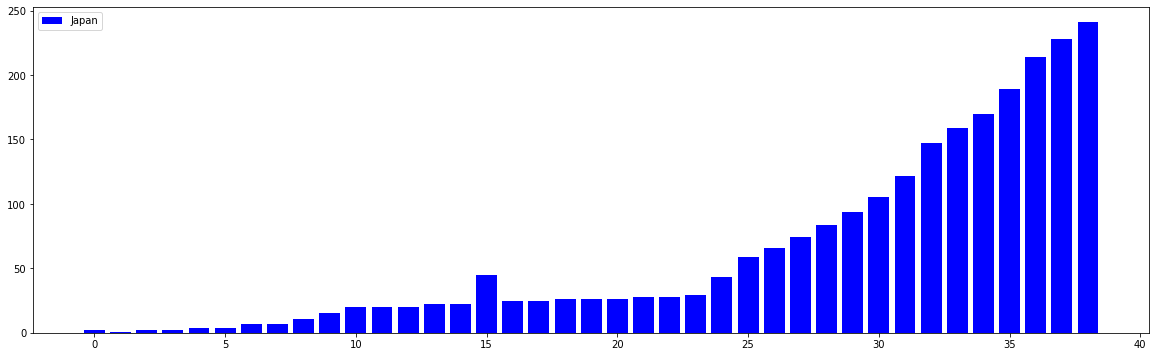

In [15]:
plt.bar(x_dat, y_dat_jap, color='blue')
plt.legend(["Japan"])

### By observing the above information and the charts, I pay attention to the following points
#### - Day 0 (22.01.2020): there were only 8 countries involved, after 38 days: there were up to 63 countries involved (29.02.2020)
#### - Day 20 (10.02.2020): there was an increasing change in China,
#### - Day 24-25 (15.02.2020): there were increasing changes in Japan, 5 days later (day 30) (20.02.2020) the similar increasing changes in South Korea and in Italy, and 5 days later (day 35) (25.02.2020) in Germany.
